<a href="https://colab.research.google.com/github/eginez/AsyncRestClient/blob/master/eginez_04_learn_fn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [158]:
!pip install -q fastbook
!pip install -q fastai

Build a 2 layer nn to approximate f(x)
I need a 
- define a synthetic function that can learn from w and biases
- create data sets and data loaders
- Loss Function
- Accuracy function
- Apply the steps for DL
  - init steps
  - do a prediction
    - in a model that contains 2 linear functions separated by a sigmoid.
  - calc loss
  - calc gradient
  - either stop or keep iterating.


In [159]:
from fastai import *
from fastbook import *
import torch
f_target = lambda x: torch.sin(x**2) + torch.cos(x)

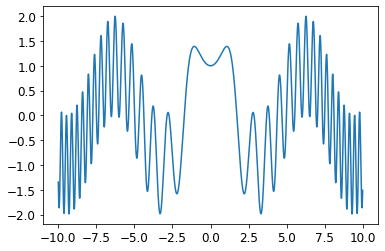

In [160]:
x_input = torch.arange(-10, 10, 0.01)
train_x = f_target(x_input)
train_y = f_target(x_input)
plt.plot(x_input, f_target(x_input))

In [161]:
def sigmoid(x): return 1/(1+torch.exp(-x))


In [162]:
def loss(pred, target): 
  return ((target - pred)**2).mean().sqrt()

In [167]:
def accuracy(pred, target): return ((pred - target).abs() < 0.0001).float().mean()

In [164]:
def show_predictions(pred, ax=None):
  if ax is None: ax = plt.subplots(figsize=(15,15))[1]
  ax.plot(x_input, train_y)
  ax.scatter(x_input, pred,color='red')


tensor(0.)

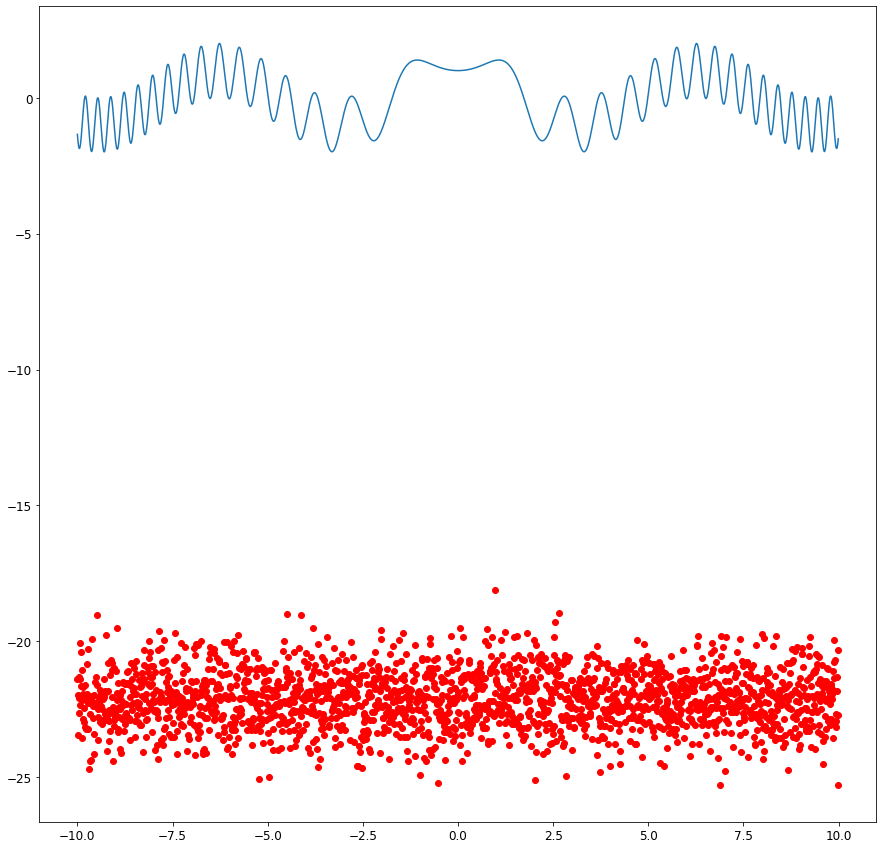

In [165]:
def init(size): return (torch.randn(size)).requires_grad_()

def linear1(x, params): return x@params[0] + params[1]  #@ = matrix mult

def simple_nn(x, params):
  w, b, w2, b2 = params
  res = linear1(x, (w, b))
  res = res.max(torch.tensor(0.0))
  res = linear1(res, (w2, b2))
  return res

def calc_grad(xbatch, ybatch, model, loss_fn, params):
  preds = model(xbatch, params)
  loss = loss_fn(preds, ybatch)
  loss.backward()
  return preds,loss

def train_epoch(model, lr, params, xbatch, ybatch, loss_fn):
  preds, loss = calc_grad(xbatch, ybatch, model, loss_fn, params)
  for p in params:
    p.data = p.data - lr * p.grad.data
    p.grad.zero_()
  return preds, loss

size_of_params=len(x_input)
preds, lss = train_epoch(linear1, 0.001, (init(size_of_params), init(size_of_params)), train_x, train_y, loss)
show_predictions(preds.detach().numpy())
accuracy(preds, train_y)


Loss: 5948.8828125, Acc: 0.0
Loss: 1.3861680030822754, Acc: 0.0
Loss: 1.3361672163009644, Acc: 0.0
Loss: 1.2861664295196533, Acc: 0.0
Loss: 1.2361657619476318, Acc: 0.0
Loss: 1.1861652135849, Acc: 0.0
Loss: 1.1361650228500366, Acc: 0.0
Loss: 1.0861648321151733, Acc: 0.0
Loss: 1.0361648797988892, Acc: 0.0
Loss: 0.9861648678779602, Acc: 0.0
Loss: 0.9361649751663208, Acc: 0.0
Loss: 0.8861650824546814, Acc: 0.0
Loss: 0.8361655473709106, Acc: 0.0
Loss: 0.7861658930778503, Acc: 0.0
Loss: 0.7361660599708557, Acc: 0.0
Loss: 0.6861661672592163, Acc: 0.0
Loss: 0.6361666917800903, Acc: 0.0
Loss: 0.5861672163009644, Acc: 0.0
Loss: 0.5361676812171936, Acc: 0.0
Loss: 0.4861679971218109, Acc: 0.0
Loss: 0.4361681640148163, Acc: 0.0
Loss: 0.3861684203147888, Acc: 0.0
Loss: 0.33616846799850464, Acc: 0.0
Loss: 0.28616857528686523, Acc: 0.0
Loss: 0.23616880178451538, Acc: 0.0
Loss: 0.18616898357868195, Acc: 0.0
Loss: 0.13616855442523956, Acc: 0.0005000000237487257
Loss: 0.08616721630096436, Acc: 0.0015000

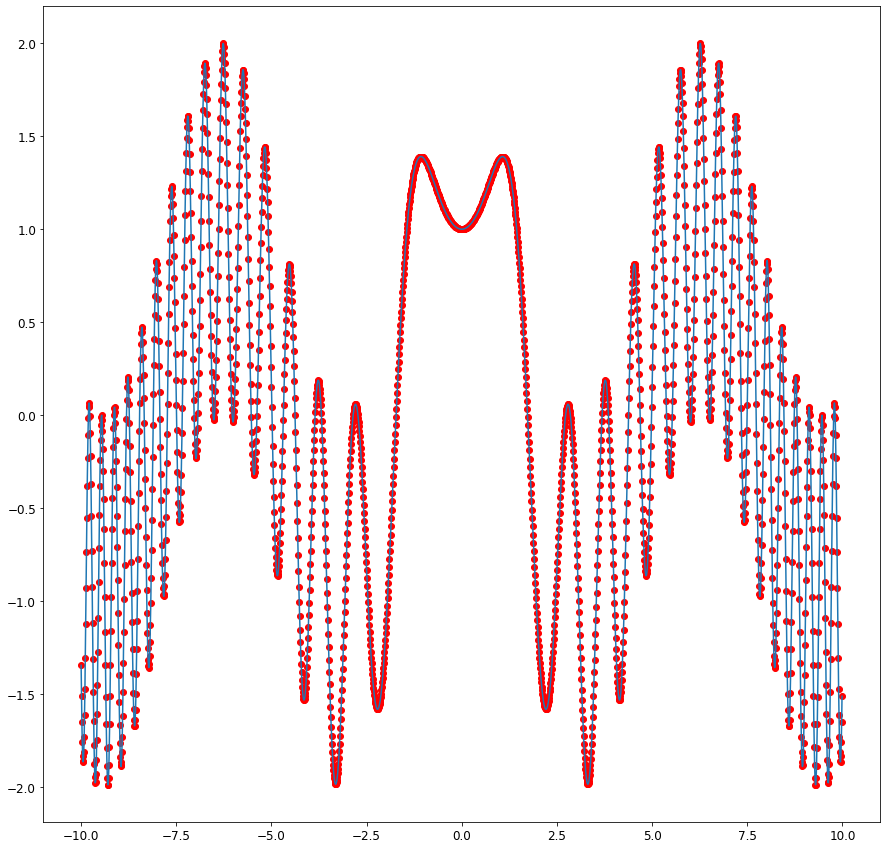

In [170]:
torch.manual_seed(100)
def train_model(epochs, model, params, lr, x, y, loss_fn):
  preds = None
  count = 0
  for i in range(epochs):
    preds, loss = train_epoch(model, lr, params, x, y, loss_fn)
    if count % 1000 == 0:
      print(f"Loss: {loss}, Acc: {accuracy(preds, train_y)}")
      count = 0
    count += 1

  return preds


size_of_params = len(x_input)
params = (init((size_of_params)), init(size_of_params), init(size_of_params), init(size_of_params))
preds = train_model(35_000, simple_nn, params, 0.1, train_x, train_y, loss)
show_predictions(preds.detach().numpy())
print(f'acc: {accuracy(preds, train_y)}')

